# Image preprocessing techniques : normalize x center x standardize pixels

References :
- https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/
- https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258
- https://stats.stackexchange.com/questions/211436/why-normalize-images-by-subtracting-datasets-image-mean-instead-of-the-current

#### Imports

In [37]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

#### Helper function

In [19]:
def plot_channels(image, title=None):
    ax = sns.kdeplot(image[:,:,0].flatten(), shade=True, color='r')
    sns.kdeplot(image[:,:,1].flatten(), shade=True, color='g')
    sns.kdeplot(image[:,:,2].flatten(), shade=True, color='b')
    ax.set(xlabel='Pixel intensity', ylabel='Frequency')
    if title is not None : ax.set_title(title)
    plt.show()

#### Load image

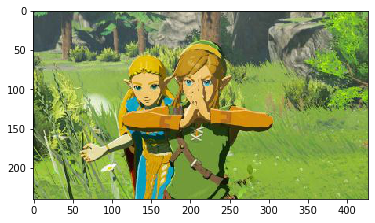

In [152]:
image = imread('../dataset/misc-images/zelda-kai.jpg')
plt.imshow(image)
plt.show()

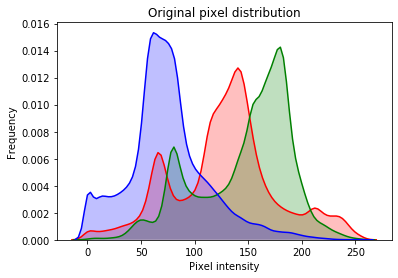

In [36]:
plot_channels(image, "Original pixel distribution")

## Normalize pixels

The values for image pixels range from 0 to 255, with 0 meaning empty and 255 meaning a full pixel with the corresponding channel color.


The normalization of pixel values is an important step when working with Neural Networks once it ensures rgat each input parameter/pixel has a similar data distributions.


As Neural Networks work with small weight values, having input pixels with large integer values can slow down the convergence process.


At this preprocessing step, the pixel values are brought to a 0-1 range.

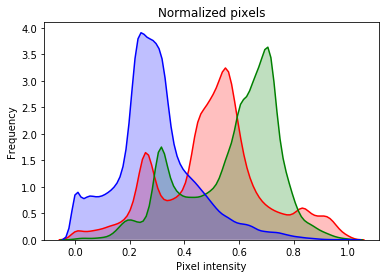

In [160]:
norm_image = image.copy()
norm_image = norm_image.astype('float32')
norm_image = norm_image/255.0
plot_channels(norm_image, "Normalized pixels")

## Center pixels

This process basically centers the pixel values distribution on the value 0.

Several machine learning algorithms, including DNNs/CNNs, work better when dealing with zero centered and normalized values.

<br>

This step can be done before and after normalizing the pixels values :
- before : pixels centered on 0.5, range between 0 and 1.
- after : pixels centered on 0.0, range from negative to positive values.

<br>

The mean can also be calculated on a local or global scope :
- local : each channel is subtracted from its own separate mean
- global : each pixel is subtracted from the overall mean (all channels together
)

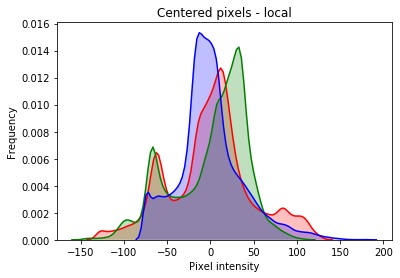

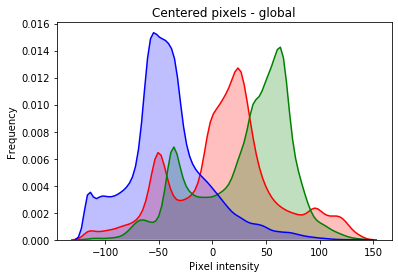

In [161]:
local_center_image = image.copy()
local_center_image = local_center_image.astype('float32')

global_center_image = image.copy()
global_center_image = global_center_image.astype('float32')

local_mean = local_center_image.mean(axis=(0,1))
global_mean = global_center_image.mean()

local_center_image -= local_mean
global_center_image -= global_mean

plot_channels(local_center_image, "Centered pixels - local")
plot_channels(global_center_image, "Centered pixels - global")

## Standardize pixels

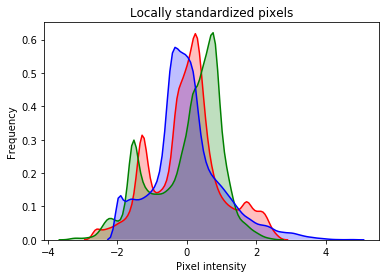

In [180]:
stand_image = image.copy()
stand_image = stand_image.astype('float32')

mean = stand_image.mean(axis=(0,1))
std = stand_image.std(axis=(0,1))

stand_image = (stand_image-mean)/std
plot_channels(stand_image, "Locally standardized pixels")